In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [32]:
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-01.parquet')

In [33]:
df2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [9]:
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

In [10]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() /60)

In [11]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.00,0.0,NaN,1.0,26.55,2.0,2.0,0.00,0.0,1.866667
11,2,2025-01-01 00:18:31,2025-01-01 00:18:46,N,5.0,92,92,1.0,0.00,35.00,...,2.00,0.0,NaN,1.0,38.00,1.0,2.0,0.00,0.0,0.250000
15,2,2025-01-01 00:31:59,2025-01-01 00:32:02,N,5.0,66,66,0.0,0.03,76.00,...,15.40,0.0,NaN,1.0,92.40,1.0,2.0,0.00,0.0,0.050000
18,2,2025-01-01 00:20:31,2025-01-01 00:20:34,N,5.0,197,197,1.0,0.00,13.00,...,1.00,0.0,NaN,1.0,15.00,1.0,2.0,0.00,0.0,0.050000
28,2,2025-01-01 00:48:38,2025-01-01 01:33:50,N,5.0,33,220,2.0,17.07,87.00,...,18.15,0.0,NaN,1.0,108.90,1.0,2.0,2.75,0.0,45.200000


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

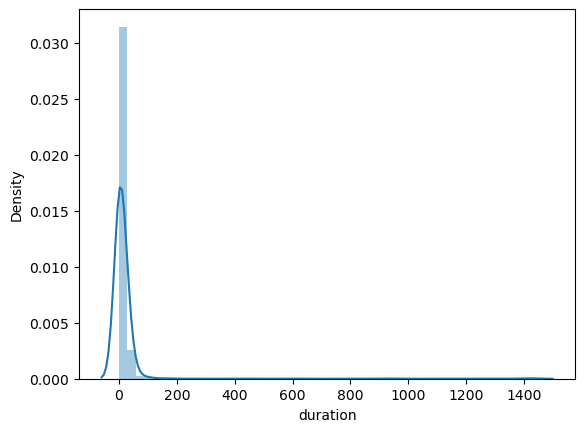

In [14]:
sns.distplot(df.duration)

In [15]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1803.000000
mean       15.896349
std        89.490679
min         0.000000
50%         1.300000
95%        38.536667
98%        59.386000
99%       106.789667
max      1439.650000
Name: duration, dtype: float64

In [24]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
28,2,2025-01-01 00:48:38,2025-01-01 01:33:50,N,5.0,33,220,2.0,17.07,87.0,...,18.15,0.0,NaN,1.0,108.9,1.0,2.0,2.75,0.0,45.200000
47,2,2025-01-01 00:44:36,2025-01-01 01:07:05,N,5.0,66,125,2.0,2.84,50.0,...,0.00,0.0,NaN,1.0,51.0,2.0,2.0,0.00,0.0,22.483333
48,2,2025-01-01 00:30:07,2025-01-01 00:59:53,N,5.0,36,209,1.0,4.86,65.0,...,13.75,0.0,NaN,1.0,82.5,1.0,2.0,2.75,0.0,29.766667
52,2,2025-01-01 00:13:51,2025-01-01 00:42:50,N,5.0,157,157,1.0,7.23,65.0,...,13.20,0.0,NaN,1.0,79.2,1.0,2.0,0.00,0.0,28.983333
77,1,2025-01-01 01:54:57,2025-01-01 02:10:10,N,5.0,255,80,1.0,2.60,50.0,...,10.00,0.0,NaN,0.0,60.0,1.0,2.0,0.00,0.0,15.216667
